### **AUTHENTICATION**

In [1]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 59 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (96.2 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144328 files and directories currently installed.)
Pr

In [5]:
# Import required libraries
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import plotly.express as px
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
import branca.colormap as cm
import folium
import matplotlib.style as style
plt.style.use('fivethirtyeight')
%matplotlib inline 

import sklearn
from math import sqrt

from itertools import groupby
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

# Import necessary modules
%tensorflow_version 1.x
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense

TensorFlow 1.x selected.


Using TensorFlow backend.


### **IMPORTING DATA**

In [6]:
india_df= pd.read_csv('https://raw.githubusercontent.com/imdevskp/covid-19-india-data/master/complete.csv')

In [7]:
india_df.tail()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
3155,2020-06-19,Telangana,18.1124,79.0193,6027,195,3301,352,3,230
3156,2020-06-19,Tripura,23.9408,91.9882,1155,1,639,20,0,83
3157,2020-06-19,Uttar Pradesh,26.8467,80.9462,15181,465,9239,583,30,335
3158,2020-06-19,Uttarakhand,30.0668,79.0193,2102,26,1386,79,0,132
3159,2020-06-19,West Bengal,22.9868,87.8550,12735,518,7001,435,12,468


### **PREPARING DATA**

In [8]:
india_df = india_df.rename(columns= {'Name of State / UT':'State', 'Total Confirmed cases': 'Confirmed', 'New cases':'New_cases' })

In [9]:
#State wise sum
india_cases = india_df.groupby('State').agg({'New_cases':np.sum})
india_deaths = india_df.groupby('State').agg({'New deaths' : np.sum})
india_recoveries = india_df.groupby('State').agg({'New recovered':np.sum})

In [10]:
india_overall = india_cases.copy()
india_overall['Deaths']= india_deaths
india_overall['Recovered']= india_recoveries
india_overall= india_overall.rename(columns={'New_cases': 'Confirmed Cases'})
india_overall.reset_index(inplace=True)

In [11]:
#Timeline
cases_over_time = india_df.groupby('Date').agg({'Confirmed': np.sum})
deaths_over_time = india_df.groupby('Date').agg({'Death': np.sum})
recoveries_over_time = india_df.groupby('Date').agg({'Cured/Discharged/Migrated': np.sum})

In [12]:
#Daily Cases
daily_cases = india_df.groupby('Date').agg({'New_cases': np.sum})
daily_deaths = india_df.groupby('Date').agg({'New deaths': np.sum})
daily_recovered= india_df.groupby('Date').agg({'New recovered': np.sum})

In [13]:
#State wise Daily Cases
state_daily_cases= india_df.pivot_table(values='Confirmed',index='Date',columns='State', aggfunc=np.sum)
state_daily_deaths= india_df.pivot_table(values='Death',index='Date',columns='State', aggfunc=np.sum)
state_daily_recoveries= india_df.pivot_table(values='Cured/Discharged/Migrated',index='Date',columns='State', aggfunc=np.sum)

In [14]:
#Top 5 States
top5_states_daily = state_daily_cases[['Maharashtra', 'Tamil Nadu', 'Delhi', 'Gujarat', 'Uttar Pradesh']]

##**EDA**

In [15]:
fig = px.line(x=cases_over_time.index, y= cases_over_time['Confirmed'],title = 'COVID-19 cases over time in India')
fig.update_layout(
    xaxis_title = 'Dates'
    ,yaxis_title = 'Number of Cases'
    ,font = dict(size = 18)
    ,template = 'plotly_dark' #"plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"
)
fig.update_traces(mode='markers+lines')

In [16]:
fig = px.line(x=deaths_over_time.index, y= deaths_over_time['Death'],title = 'COVID-19 deaths over time in India')
fig.update_layout(
    xaxis_title = 'Dates'
    ,yaxis_title = 'Number of Deaths'
    ,font = dict(size = 18)
    ,template = 'plotly_dark' #"plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"
)
fig.update_traces(mode='markers+lines')

In [17]:
fig = px.line(x=recoveries_over_time.index, y= recoveries_over_time['Cured/Discharged/Migrated'],title = 'COVID-19 recoveries over time in India')
fig.update_layout(
    xaxis_title = 'Dates'
    ,yaxis_title = 'Number of Recovered Cases'
    ,font = dict(size = 18)
    ,template = 'plotly_white' #"plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"
)
fig.update_traces(mode='markers+lines')

Use the Filters/Slider to filter Dates

In [18]:
fig = px.bar(x=daily_cases.index, y= daily_cases['New_cases'])
fig.update_layout(
    title = 'Daily Cases due to COVID-19'
    ,xaxis_title = 'Dates'
    ,yaxis_title = 'Number of Cases'
    ,font = dict(size = 18)
    ,template = 'plotly_dark' #"plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"
)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=2, label="2m", step="month", stepmode="backward"),
            dict(step="all")
        ]),
        font = dict( color='#008000', size = 11),
    )
)

Use the Filters/Slider to filter Dates

In [19]:
fig = px.bar(x=daily_deaths.index, y= daily_deaths['New deaths'])
fig.update_layout(
    title = 'Daily Deaths due to COVID-19'
    ,xaxis_title = 'Dates'
    ,yaxis_title = 'Number of Deaths'
    ,font = dict(size = 18)
    ,template = 'plotly_dark' #"plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"
)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=2, label="2m", step="month", stepmode="backward"),
            dict(step="all")
        ]),
        font = dict( color='#008000', size = 11),
    )
)

Use the Filters/Slider to filter Dates

In [20]:
fig = px.bar(x=daily_recovered.index, y= daily_recovered['New recovered'])
fig.update_layout(
    title = 'Daily recovered cases'
    ,xaxis_title = 'Dates'
    ,yaxis_title = 'Number of Recoveries'
    ,font = dict(size = 18)
    ,template = 'plotly_white' #"plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"
)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1w", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=2, label="2m", step="month", stepmode="backward"),
            dict(step="all")
        ]),
        font = dict( color='#008000', size = 11),
    )
)

In [21]:
fig = px.line()
for i,n in enumerate(top5_states_daily.columns):
    fig.add_scatter(x=top5_states_daily.index, y= top5_states_daily[top5_states_daily.columns[i]], name= top5_states_daily.columns[i])
fig.update_traces(mode='markers+lines')
fig.update_layout(
    title = 'Top 5 States Daily Cases'
    ,xaxis_title = 'Dates'
    ,yaxis_title = 'Number of Cases'
    ,font = dict(size = 15)
    ,template = 'plotly_dark' #"plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"
)

In [22]:
fig = px.bar(x=india_cases.index, y= india_cases['New_cases'])
fig.update_layout(
    title = 'State wise COVID-19 Cases'
    ,yaxis_title = 'Number of Cases'
    ,font = dict(size = 15)
    ,template = 'seaborn' #"plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"
    )

In [23]:
import plotly.express as px
df = india_overall
fig = px.scatter(df, x="Deaths", y="Confirmed Cases", size="Confirmed Cases", color="State",
           hover_name="State", log_x=True, size_max=60, text = "State")
fig.update_layout(
    showlegend= False,
    height=500,
    title = 'Cases vs Deaths for States'
    ,font = dict(size = 15)
    ,template = 'plotly_dark' #"plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"
)
fig.update_traces(textposition='top center', textfont_size=12)

In [24]:
#Overall State Table
india_overall= india_overall.sort_values(by='Confirmed Cases', ascending=False)
india_overall['Mortality Rate']= india_overall['Deaths']/ india_overall['Confirmed Cases']
india_overall['Recovery Rate'] = india_overall['Recovered']/ india_overall['Confirmed Cases']
india_overall.style.background_gradient(cmap='Reds')

,State,Confirmed Cases,Deaths,Recovered,Mortality Rate,Recovery Rate
19,Maharashtra,120506,5751,60838,0.047724,0.504855
29,Tamil Nadu,52333,625,28641,0.011943,0.547284
8,Delhi,49978,1969,21341,0.039397,0.427008
10,Gujarat,25599,1591,17819,0.062151,0.696082
36,Uttar Pradesh,15175,465,9239,0.030643,0.608830
27,Rajasthan,13856,323,10742,0.023311,0.775260
38,West Bengal,12734,518,7001,0.040678,0.549788
18,Madhya Pradesh,11422,486,8632,0.042549,0.755735
11,Haryana,9204,134,4556,0.014559,0.495002
15,Karnataka,7943,114,4983,0.014352,0.627345


**MAP**

In [25]:
india_cases.reset_index(inplace=True)

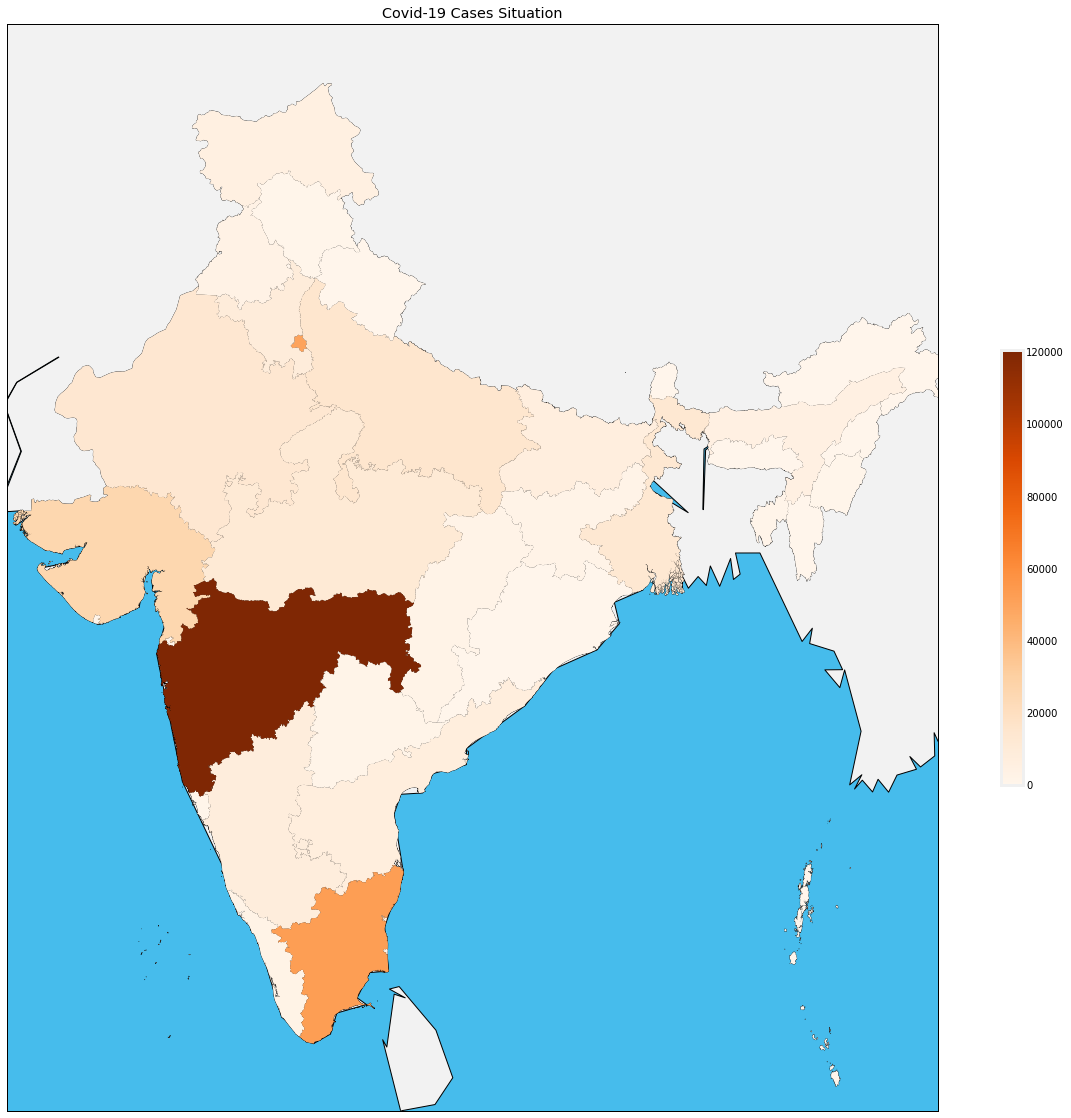

In [28]:
data = india_cases
states_group = data.groupby(by = 'State')
sat_list = []

for key, group in states_group:
    sat = 0
    for row in group.iterrows():
        sat += row[1][1]
    sat_list.append((key,sat))

fig, ax = plt.subplots() 
m = Basemap(resolution='c', projection='merc', lat_0=54.5, lon_0=-4.36, llcrnrlon=68., llcrnrlat=6., urcrnrlon=97., urcrnrlat=37.)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
m.drawcoastlines()

m.readshapefile('/content/drive/My Drive/IND_adm/IND_adm1','INDIA')

satlist = []

for state_info in m.INDIA_info:
    state = state_info['NAME_1']
    sat1 = 0
    
    for x in sat_list:
        if x[0] == state:
            sat1 = x[1]
            break
    satlist.append(sat1)

df_poly = pd.DataFrame({'shapes':[Polygon(np.array(shape), True) for shape in m.INDIA],
                       'area':[area['NAME_1'] for area in m.INDIA_info],
                       'satlist': satlist})
    
shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
cmap = plt.get_cmap('Oranges')

pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
pc.set_facecolor(cmap(norm(df_poly['satlist'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(satlist)
plt.colorbar(mapper, shrink=0.4)

ax.set_title('Covid-19 Cases Situation')
plt.rcParams['figure.figsize'] = [20,20]
plt.show()

##**Kalman Filter**

In [29]:
state_kalman=state_daily_cases.fillna(0)
state_kalman.reset_index(inplace=True)
state_kalman=state_kalman.rename(columns = {'Date':'date'})
state_kalman['date']=pd.to_datetime(state_kalman['date'] ,errors ='coerce')
state_kalman.to_csv(r'/content/drive/My Drive/india.csv')

In [30]:
import rpy2
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning:

pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning:

pandas >= 1.0 is not supported.



In [31]:
%%R
install.packages('pracma')
install.packages('reshape')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pracma_2.2.9.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 400551 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [32]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/content/drive/My Drive/india.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [33]:
p=%R pred_all

In [34]:
state_daily_cases=state_daily_cases.fillna(0)

In [35]:
t=state_daily_cases
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y'].values
temp['X']=p['X'].values
temp['X2']=p['X2'].values

In [36]:
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is t.iloc[i-2,1]):
    t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
    t.iloc[i,6]=(t.iloc[i-1,2]/t.iloc[i-2,2]-1)*100
    t.iloc[i,9]=t.iloc[i-1,2]
  if(t.iloc[i,1] is t.iloc[i-4,1]):
    t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
    t.iloc[i,7]=(t.iloc[i-1,2]/t.iloc[i-4,2]-1)*100
  if(t.iloc[i,1] is t.iloc[i-8,1]):
    t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
    t.iloc[i,8]=(t.iloc[i-1,2]/t.iloc[i-8,2]-1)*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)
t['kalman_prediction']=round(t['kalman_prediction'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning:

divide by zero encountered in double_scalars



**Kalman 1 day Prediction with Evaluation**

  region          mse         mae
8  Delhi  71883.93662  129.232394


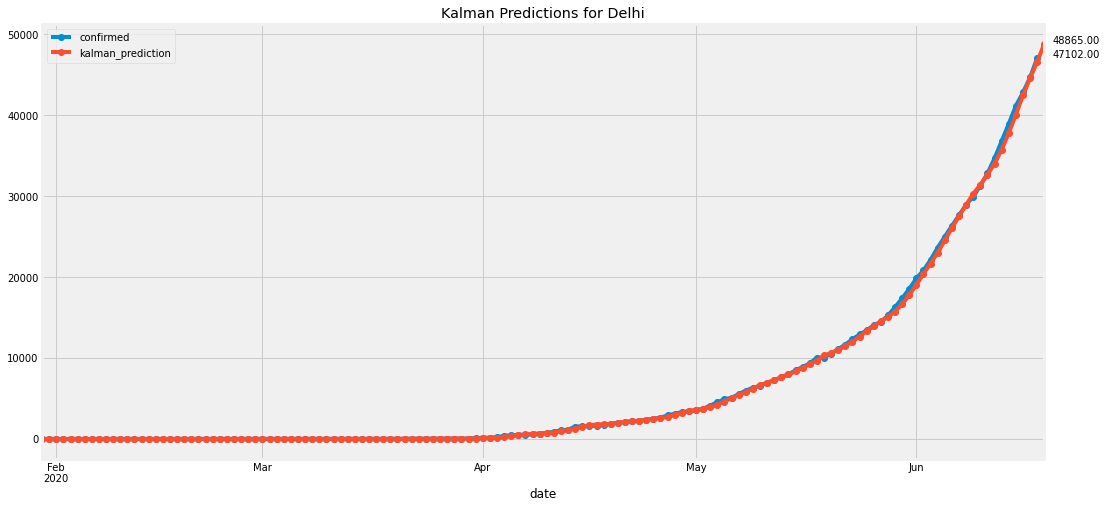

In [37]:
# Select region
region='Delhi'

evaluation=pd.DataFrame(columns=['region','mse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(state_daily_cases):i,10])
    pred=np.array(t.iloc[i-len(state_daily_cases):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Predictions for {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])
for var in (p['confirmed'], p['kalman_prediction']):
    plt.annotate('%0.2f' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.show()

    region         mse       mae
16  Kerala  247.584507  9.359155


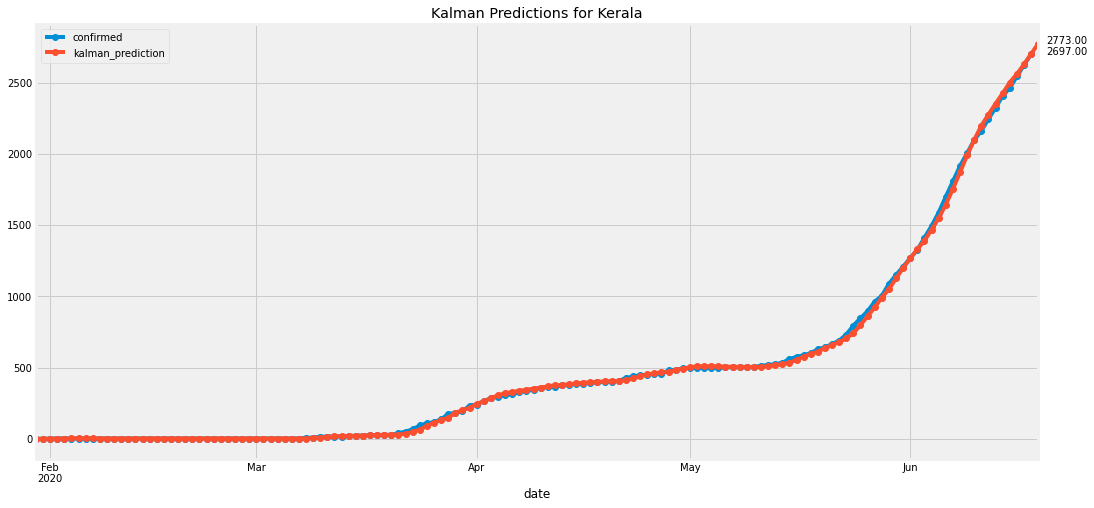

In [38]:
# Select region
region='Kerala'

evaluation=pd.DataFrame(columns=['region','mse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(state_daily_cases):i,10])
    pred=np.array(t.iloc[i-len(state_daily_cases):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Predictions for {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])
for var in (p['confirmed'], p['kalman_prediction']):
    plt.annotate('%0.2f' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.show()

         region            mse         mae
19  Maharashtra  130422.077465  203.725352


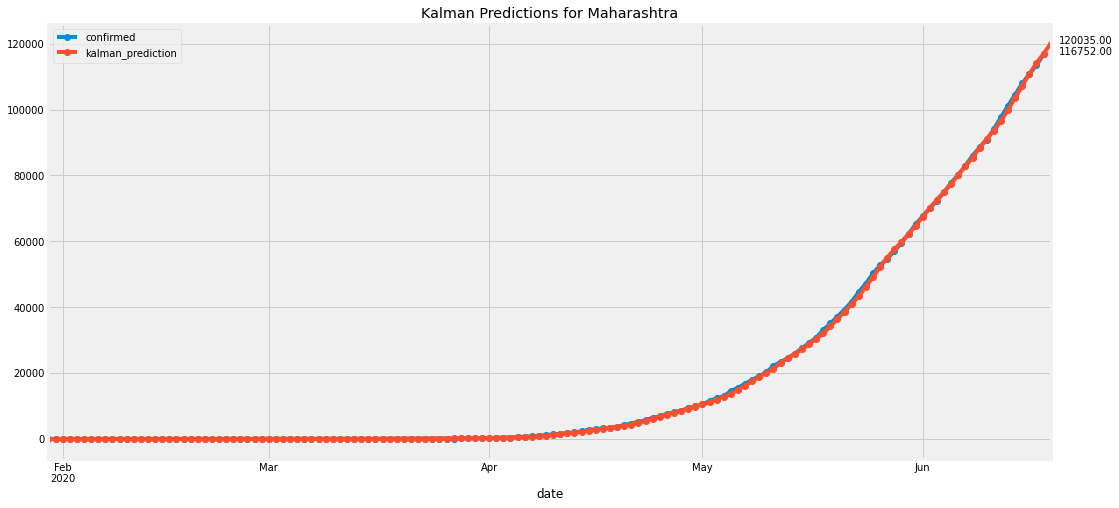

In [39]:
# Select region
region='Maharashtra'

evaluation=pd.DataFrame(columns=['region','mse','mae'])
place=0
for i in range(1,len(t)):
  if(t.iloc[i,1] is not t.iloc[i-1,1]):
    ex=np.array(t.iloc[i-len(state_daily_cases):i,10])
    pred=np.array(t.iloc[i-len(state_daily_cases):i,2])
    evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Predictions for {}'.format(p.iloc[0,0]))
print(evaluation[evaluation['region']==p.iloc[0,0]])
for var in (p['confirmed'], p['kalman_prediction']):
    plt.annotate('%0.2f' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.show()

**Kalman X Days Ahead Prediction**

In [40]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/content/drive/My Drive/india.csv")
all$X1<-NULL
for (i in 1:30) { # Set i days prediction
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

R[write to console]: Loading required package: Metrics

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [41]:
all_new=%R all_new

In [42]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction')

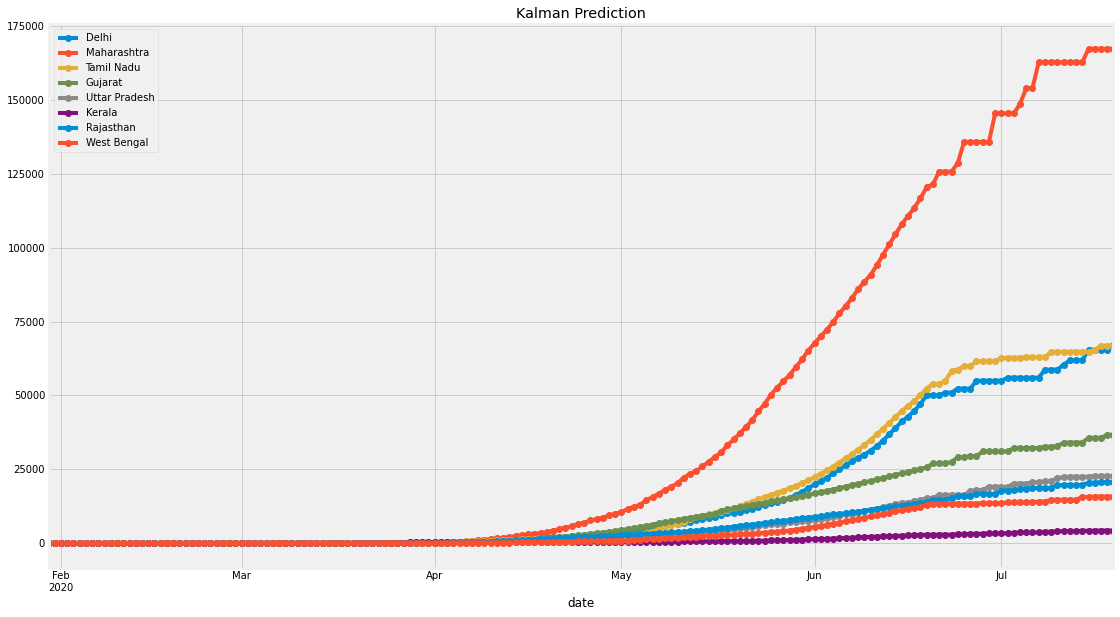

In [43]:
region=['date','Delhi', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Uttar Pradesh',
       'Kerala', 'Rajasthan', 'West Bengal'
       ]
p_kalman=all_new[region]
p=all_new
p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(17,10)).set_title('Kalman Prediction')

In [44]:
fig = px.line(x=all_new['date'], y= all_new['Delhi'],title = 'COVID-19 Next Month Prediction for Delhi')
fig.update_layout(
    xaxis_title = 'Dates'
    ,yaxis_title = 'Number of Cases'
    ,font = dict(size = 18)
    ,template = 'plotly_white' #"plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"
)
fig.update_traces(mode='markers+lines')

In [45]:
from google.colab import files
all_new.to_csv('Covid19_India_predictions.csv')
files.download("Covid19_India_predictions.csv")

##**ARIMA MODEL**

In [46]:
cases_over_time.head()

,Confirmed
Date,
2020-01-30,1
2020-01-31,1
2020-02-01,2
2020-02-02,3
2020-02-03,3


In [47]:
data= cases_over_time.copy()
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



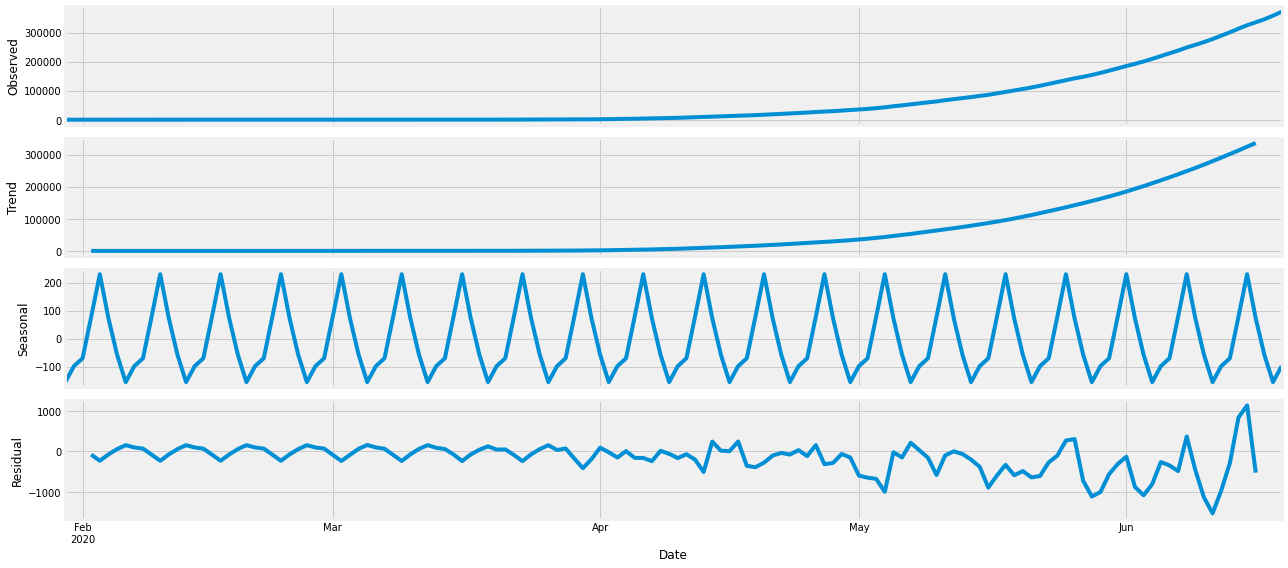

In [48]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(data, model='additive')
fig = decomposition.plot()
plt.show()

In [49]:
import warnings
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [50]:
import warnings
warnings.filterwarnings("ignore")
for param in pdq:
  for param_seasonal in seasonal_pdq:
    try:
      mod = sm.tsa.statespace.SARIMAX(data, order=param, seasonal_order= param_seasonal, enforce_stationarity=False,enforce_invertibility=False)
      results =mod.fit()
      print('ARIMA{}x{}12-AIC:{}'.format(param,param_seasonal,results.aic))
    except:
        continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12-AIC:3683.2415722570126
ARIMA(0, 0, 0)x(0, 0, 1, 12)12-AIC:3311.6941046891684
ARIMA(0, 0, 0)x(0, 1, 0, 12)12-AIC:3148.3156360354606
ARIMA(0, 0, 0)x(0, 1, 1, 12)12-AIC:2806.2844307337477
ARIMA(0, 0, 0)x(1, 0, 0, 12)12-AIC:2708.20638860865
ARIMA(0, 0, 0)x(1, 0, 1, 12)12-AIC:2642.484175586009
ARIMA(0, 0, 0)x(1, 1, 0, 12)12-AIC:2300.0296824231186
ARIMA(0, 0, 0)x(1, 1, 1, 12)12-AIC:2270.883877572608
ARIMA(0, 0, 1)x(0, 0, 0, 12)12-AIC:3557.6490479116765
ARIMA(0, 0, 1)x(0, 0, 1, 12)12-AIC:3234.721806892832
ARIMA(0, 0, 1)x(0, 1, 0, 12)12-AIC:3033.2313087045686
ARIMA(0, 0, 1)x(0, 1, 1, 12)12-AIC:2836.233799292011
ARIMA(0, 0, 1)x(1, 0, 0, 12)12-AIC:3273.026554937156
ARIMA(0, 0, 1)x(1, 0, 1, 12)12-AIC:3224.6873694805454
ARIMA(0, 0, 1)x(1, 1, 0, 12)12-AIC:2169.710174421722
ARIMA(0, 0, 1)x(1, 1, 1, 12)12-AIC:2124.1301376036795
ARIMA(0, 1, 0)x(0, 0, 0, 12)12-AIC:2754.6524193854684
ARIMA(0, 1, 0)x(0, 0, 1, 12)12-AIC:2404.5534779400177
ARIMA(0, 1, 0)x(0, 1, 0, 12)12-AIC:2

ARIMA(1, 1, 1)x(0, 1, 1, 12)12-AIC:1761.9725764983566 gives the lowest AIC

In [51]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0252      0.004    250.820      0.000       1.017       1.033
ma.L1         -0.7537      0.065    -11.609      0.000      -0.881      -0.626
ma.S.L12      -0.8102      0.191     -4.243      0.000      -1.184      -0.436
sigma2       4.08e+05   7.51e+04      5.436      0.000    2.61e+05    5.55e+05


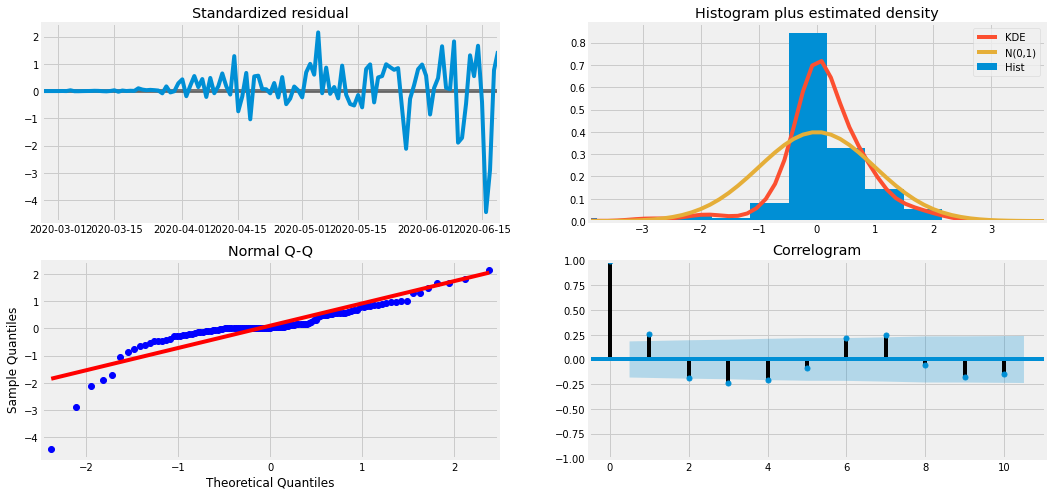

In [52]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

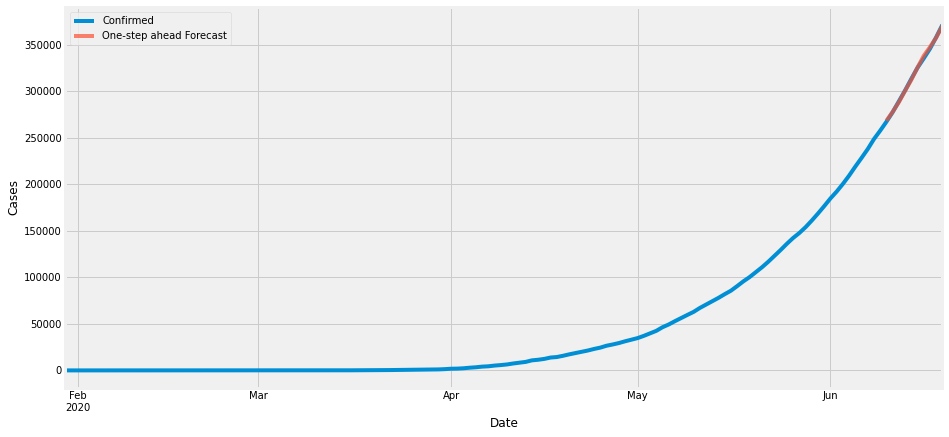

In [53]:
pred = results.get_prediction(start=pd.to_datetime('2020-06-10'), dynamic=False)
pred_ci = pred.conf_int()
ax = data['2020-01-22':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Cases')
plt.legend()
plt.show()

In [54]:
#MSE and RMSE
y_forecasted = pred.predicted_mean
y_truth = data['2020-06-01':]['Confirmed']
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 1596003.02
The Root Mean Squared Error of our forecasts is 1263.33


Producing and Visualizing Forecasts

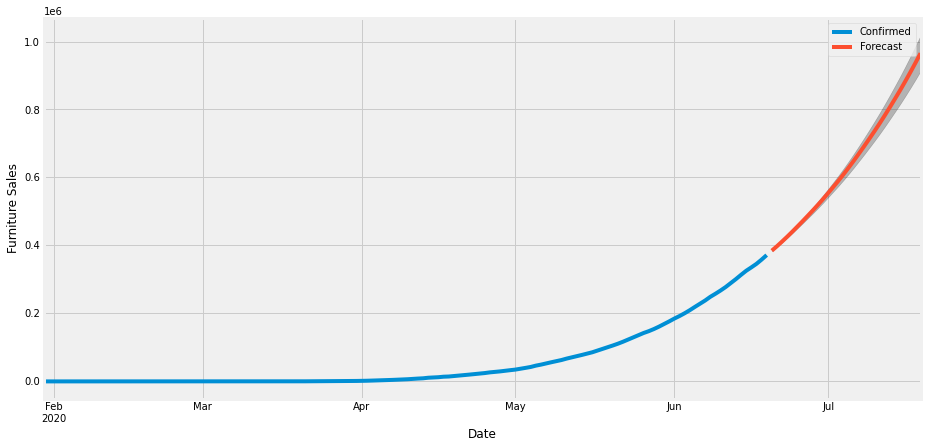

In [55]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = data.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [56]:
#Next Day's Prediction
pred_uc.predicted_mean[0]

384633.95902714715

**FACEBOOK PROPHET**

In [57]:
from fbprophet import Prophet
fb_df = cases_over_time.copy()
fb_df.reset_index(inplace=True)

In [58]:
# Prophet requires columns ds (Date) and y (value)
fb_df = fb_df.rename(columns={'Date': 'ds', 'Confirmed': 'y'})
fb_df.head()

,ds,y
0,2020-01-30,1
1,2020-01-31,1
2,2020-02-01,2
3,2020-02-02,3
4,2020-02-03,3


In [59]:
# Make the prophet model and fit on the data
fb_prophet = Prophet(yearly_seasonality=False)
fb_prophet.fit(fb_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [60]:
# Python
future = fb_prophet.make_future_dataframe(periods=10)
future.tail()

,ds
147,2020-06-25
148,2020-06-26
149,2020-06-27
150,2020-06-28
151,2020-06-29


In [61]:
forecast = fb_prophet.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
142,2020-06-20,360047.703892,354464.119905,365746.741750
143,2020-06-21,368944.563292,363146.741924,374755.745074
144,2020-06-22,377909.033272,371902.506153,383405.360444
145,2020-06-23,386644.624656,380672.917491,392812.640710
146,2020-06-24,395411.714744,389975.053040,401122.947789
147,2020-06-25,404376.113375,398831.548165,410193.353319
148,2020-06-26,413309.795777,407201.899593,419841.807971
149,2020-06-27,421074.569871,414325.910404,427300.290233
150,2020-06-28,429971.429272,423066.291329,436387.555062
151,2020-06-29,438935.899251,432106.019192,445832.382231


In [62]:
# 1 day Prediction
future_day = fb_prophet.make_future_dataframe(periods=1)
future_day.tail()

,ds
138,2020-06-16
139,2020-06-17
140,2020-06-18
141,2020-06-19
142,2020-06-20


In [63]:
forecast_day = fb_prophet.predict(future_day)
forecast_day[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(1)

,ds,yhat,yhat_lower,yhat_upper
142,2020-06-20,360047.703892,354247.099092,365554.489081


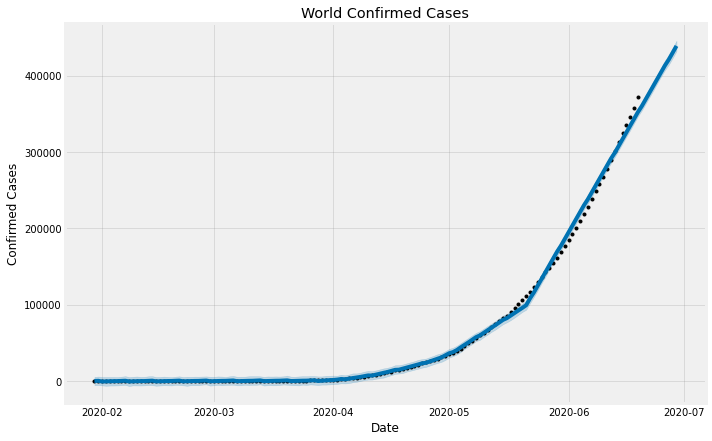

In [64]:
fb_prophet.plot(forecast, xlabel = 'Date', ylabel = 'Confirmed Cases')
plt.title('World Confirmed Cases');

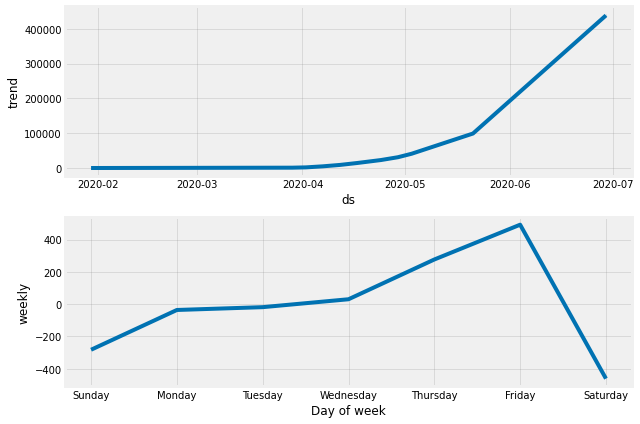

In [65]:
#Components
comp = fb_prophet.plot_components(forecast)

In [66]:
metric_df = forecast.set_index('ds')[['yhat']].join(fb_df.set_index('ds').y).reset_index()

In [67]:
metric_df.dropna(inplace=True)

In [68]:
#Calculating MSE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse= mean_squared_error(metric_df.y, metric_df.yhat)
rmse = sqrt(mean_squared_error(metric_df.y, metric_df.yhat))
print(mse)
print(rmse)

19136285.40126608
4374.504017744878


##**LSTM MODELS**

In [69]:
confirmed_df=cases_over_time.values

In [70]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [71]:
# split into train and test sets
train_size = int(len(confirmed_df) * 0.90)
test_size = len(confirmed_df) - train_size
train, test = confirmed_df[0:train_size,:], confirmed_df[train_size:len(confirmed_df),:]

In [72]:
# define input sequence
raw_seq = confirmed_df
# reshape dataset
n_steps = 3
trainX, trainY = split_sequence(train, n_steps)
testX, testY = split_sequence(test, n_steps)

In [73]:
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(trainX)):
	       (trainX[i], trainY[i])

In [74]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))

In [75]:
# define model
from keras.models import Sequential
from keras.layers import Dense,LSTM
from keras.layers.wrappers import TimeDistributed
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [76]:
# fit model
model.fit(trainX, trainY, epochs=200, verbose=0)

In [77]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 1557160.68 MSE (1247.86 RMSE)
Test Score: 19221782.00 MSE (4384.27 RMSE)


In [78]:
testY

array([[248774],
       [257795],
       [267356],
       [277648],
       [289220],
       [301009],
       [313486],
       [325452],
       [335407],
       [345792],
       [358243],
       [371605]])

In [79]:
# demonstrate prediction
x_input = array([testY[-3:]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat1 = model.predict(x_input, verbose=0)
yhat1

array([[390479.25]], dtype=float32)

**Stacked LSTM**

In [80]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [81]:
# fit model
model.fit(trainX, trainY, epochs=300, verbose=0)

In [82]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 1000885.59 MSE (1000.44 RMSE)
Test Score: 76073944.00 MSE (8722.04 RMSE)


In [83]:
# demonstrate prediction
x_input = array([testY[-3:]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat2 = model.predict(x_input, verbose=0)
yhat2

array([[396310.56]], dtype=float32)

**Bidirectional LSTM**

In [84]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [85]:
# fit model
model.fit(trainX, trainY, epochs=200, verbose=0)
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 765327.23 MSE (874.83 RMSE)
Test Score: 41054496.00 MSE (6407.38 RMSE)


In [86]:
# demonstrate prediction
x_input = array([testY[-3:]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat3 = model.predict(x_input, verbose=0)
yhat3

array([[393299.88]], dtype=float32)

**CNN LSTM**

In [87]:
# univariate cnn lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [88]:
# define input sequence
raw_seq = confirmed_df
# reshape dataset
n_steps = 4
trainX, trainY = split_sequence(train, n_steps)
testX, testY = split_sequence(test, n_steps)

In [89]:
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(trainX)):
			  (trainX[i], trainY[i])

In [90]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
trainX = trainX.reshape((trainX.shape[0], n_seq, n_steps, n_features))

In [91]:
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
n_features = 1
n_seq = 2
n_steps = 2
testX = testX.reshape((testX.shape[0], n_seq, n_steps, n_features))

In [92]:
# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(trainX, trainY, epochs=500, verbose=0)

In [93]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 3434479.24 MSE (1853.23 RMSE)
Test Score: 4508682.50 MSE (2123.37 RMSE)


In [94]:
testY

array([[257795],
       [267356],
       [277648],
       [289220],
       [301009],
       [313486],
       [325452],
       [335407],
       [345792],
       [358243],
       [371605]])

In [95]:
# demonstrate prediction
x_input = array([testY[-4:]])
x_input = x_input.reshape((1, n_seq, n_steps, n_features))
yhat4 = model.predict(x_input, verbose=0)
print(yhat4)

[[384715.56]]


**Deep Learning Model using sliding windows method**

Epoch 1/400
 - 0s - loss: 2399054826.0075
Epoch 2/400
 - 0s - loss: 1408957619.3635
Epoch 3/400
 - 0s - loss: 642863595.7848
Epoch 4/400
 - 0s - loss: 192754037.7287
Epoch 5/400
 - 0s - loss: 2587822.1182
Epoch 6/400
 - 0s - loss: 1137117.3536
Epoch 7/400
 - 0s - loss: 1082614.4684
Epoch 8/400
 - 0s - loss: 1071125.4738
Epoch 9/400
 - 0s - loss: 940494.9271
Epoch 10/400
 - 0s - loss: 1069609.0670
Epoch 11/400
 - 0s - loss: 1298476.4984
Epoch 12/400
 - 0s - loss: 1006897.6762
Epoch 13/400
 - 0s - loss: 1165418.2958
Epoch 14/400
 - 0s - loss: 1088707.8215
Epoch 15/400
 - 0s - loss: 1253082.5408
Epoch 16/400
 - 0s - loss: 1026260.3827
Epoch 17/400
 - 0s - loss: 1024762.1844
Epoch 18/400
 - 0s - loss: 936107.7316
Epoch 19/400
 - 0s - loss: 1066004.1639
Epoch 20/400
 - 0s - loss: 1076726.3509
Epoch 21/400
 - 0s - loss: 1249019.3988
Epoch 22/400
 - 0s - loss: 1162906.2228
Epoch 23/400
 - 0s - loss: 1097615.4131
Epoch 24/400
 - 0s - loss: 939757.9490
Epoch 25/400
 - 0s - loss: 885666.7121
Epo

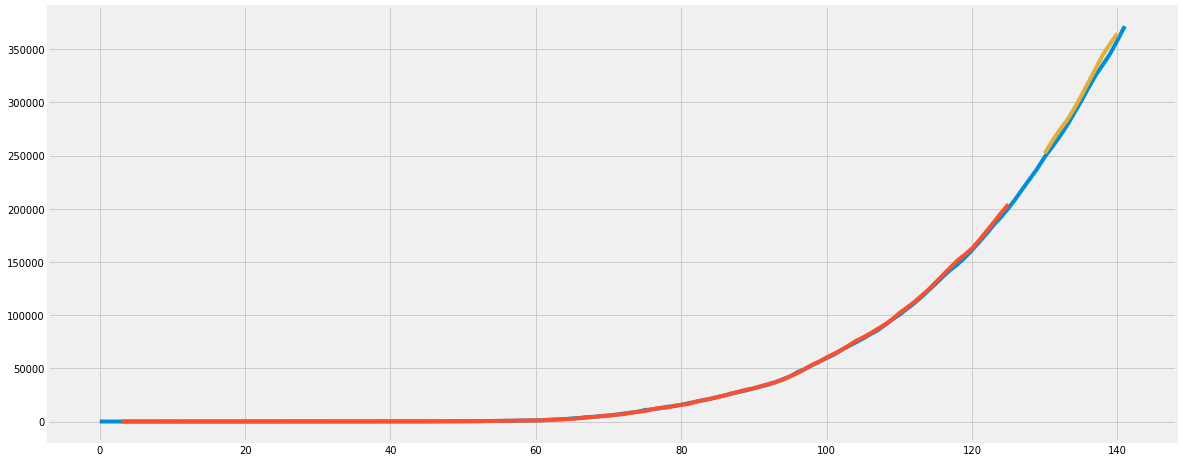

In [96]:
# Multilayer Perceptron to Predict Next days Confirmed Cases (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# load the dataset
dataset = confirmed_df
dataset = dataset.astype('float32')

# split into train and test sets
train_size = int(len(dataset) * 0.90)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [97]:
testPredict

array([[252123.23],
       [263302.34],
       [273641.94],
       [282556.03],
       [293487.12],
       [305779.72],
       [318766.62],
       [331800.47],
       [344745.4 ],
       [355137.78],
       [364768.78]], dtype=float32)

In [98]:
testY

array([248774., 257795., 267356., 277648., 289220., 301009., 313486.,
       325452., 335407., 345792., 358243.], dtype=float32)

**Since Arima gave the least error among all the Models, we will use the future values of Arima to predict next day's value for the DNN Model**

In [99]:
data_values= data.values

In [100]:
data.tail()

,Confirmed
Date,
2020-06-15,325452
2020-06-16,335407
2020-06-17,345792
2020-06-18,358243
2020-06-19,371605


In [101]:
pred_uc.predicted_mean.values[0:2]

array([384633.95902715, 397676.78945994])

In [102]:
predict_values= pred_uc.predicted_mean.values[0:2]
predict_values= predict_values.reshape(2,1)

In [103]:
arima_values= numpy.concatenate((data_values,predict_values))
arima_values.shape

(144, 1)

Epoch 1/400
 - 0s - loss: 1000862771.5162
Epoch 2/400
 - 0s - loss: 296728516.9023
Epoch 3/400
 - 0s - loss: 29967690.5113
Epoch 4/400
 - 0s - loss: 1518308.7503
Epoch 5/400
 - 0s - loss: 911983.3791
Epoch 6/400
 - 0s - loss: 775046.7873
Epoch 7/400
 - 0s - loss: 924501.7817
Epoch 8/400
 - 0s - loss: 788745.6061
Epoch 9/400
 - 0s - loss: 784330.7037
Epoch 10/400
 - 0s - loss: 766842.4198
Epoch 11/400
 - 0s - loss: 784350.9671
Epoch 12/400
 - 0s - loss: 783035.1648
Epoch 13/400
 - 0s - loss: 805001.5060
Epoch 14/400
 - 0s - loss: 900518.4212
Epoch 15/400
 - 0s - loss: 798698.3750
Epoch 16/400
 - 0s - loss: 814392.8473
Epoch 17/400
 - 0s - loss: 840668.8527
Epoch 18/400
 - 0s - loss: 802208.8713
Epoch 19/400
 - 0s - loss: 720784.8090
Epoch 20/400
 - 0s - loss: 802520.0759
Epoch 21/400
 - 0s - loss: 856918.2443
Epoch 22/400
 - 0s - loss: 906734.1222
Epoch 23/400
 - 0s - loss: 830652.5815
Epoch 24/400
 - 0s - loss: 930267.6342
Epoch 25/400
 - 0s - loss: 778575.1461
Epoch 26/400
 - 0s - los

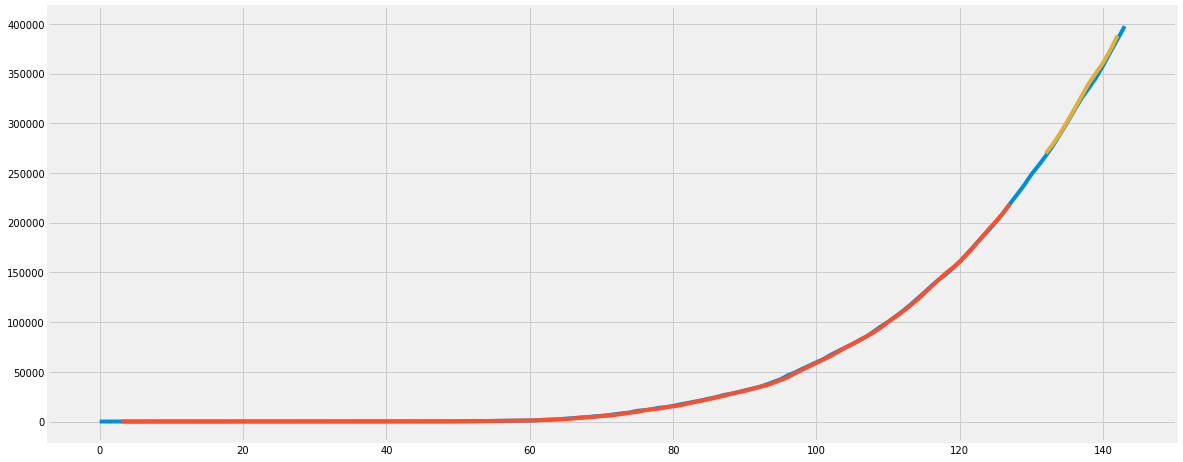

In [104]:
# Multilayer Perceptron to Predict Next days Confirmed Cases (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# load the dataset
dataset = arima_values
dataset = dataset.astype('float32')

# split into train and test sets
train_size = int(len(dataset) * 0.90)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape dataset
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [105]:
#Next Days Prediction
testPredict[-1]

array([388072.53], dtype=float32)

# **Compiling the Predictions**

In [106]:
ar= pd.Series(pred_uc.predicted_mean[0])
ar_df= pd.DataFrame(ar)
fb= pd.Series(forecast_day['yhat'].tail(1))
fb_df= pd.DataFrame(fb)
fb_df= fb_df.rename(columns={"yhat": 0 })
fb_df.rename(index={148:0},inplace=True)
dnn=testPredict[-1].reshape(1,1)
x=np.concatenate((yhat1,yhat2,yhat3,yhat4,dnn))
x.reshape(1,5)
res= pd.DataFrame(x)
results = ar_df.append(fb_df)
results = results.append(res)
results.reset_index(drop=True, inplace=True)
results= results.rename(columns={0 : "Next Day's Prediction"})

In [107]:
model_names = ["Arima", "Facebook Prophet", "Vanilla LSTM", "Stacked LSTM", "Bidirectional LSTM", "CNN LSTM", "DNN"]
models = pd.DataFrame(data= model_names)
models= models.rename(columns={0 : "Models"})

In [108]:
models["Next Day's Prediction"] = results
models["Next Day's Prediction"]= round(models["Next Day's Prediction"],0)

In [109]:
table =models.style.set_properties(**{'text-align': 'center','border-color':'Black','border-width':'thin','border-style':'dotted'})

# **Results**

In [110]:
table

,Models,Next Day's Prediction
0,Arima,384634.000000
1,Facebook Prophet,360048.000000
2,Vanilla LSTM,390479.000000
3,Stacked LSTM,396311.000000
4,Bidirectional LSTM,393300.000000
5,CNN LSTM,384716.000000
6,DNN,388073.000000
